In [4]:
"#%%"

'#%%'

In [5]:
# Chapter 9 그래프와 시각화

In [6]:
import numpy as np
import pandas as pd
PREVIOUS_MAX_ROWS = pd.options.display.max_rows
pd.options.display.max_rows = 20
pd.options.display.max_colwidth = 80
pd.options.display.max_columns = 20
np.random.seed(12345)
import matplotlib.pyplot as plt
import matplotlib
plt.rc("figure", figsize=(10, 6))
np.set_printoptions(precision=4, suppress=True)

Text(0.5, 1.0, 'Important dates in the 2008-2009 financial crisis')

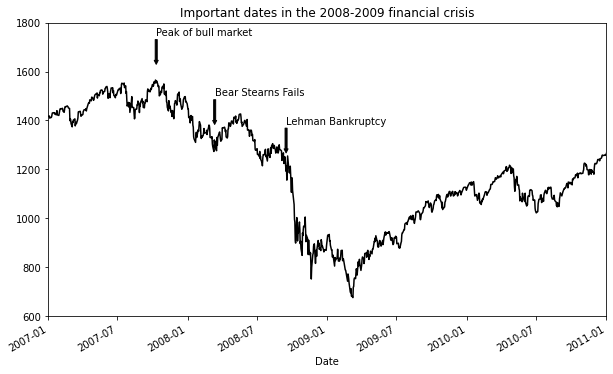

In [8]:
from datetime import datetime

fig, ax = plt.subplots()

data = pd.read_csv("examples/spx.csv", index_col=0, parse_dates=True)
spx = data["SPX"]

spx.plot(ax=ax, color="black")

crisis_data = [
    (datetime(2007, 10, 11), "Peak of bull market"),
    (datetime(2008, 3, 12), "Bear Stearns Fails"),
    (datetime(2008, 9, 15), "Lehman Bankruptcy")
]

for date, label in crisis_data:
    ax.annotate(label, xy=(date, spx.asof(date) + 75),
                xytext=(date, spx.asof(date) + 225),
                arrowprops=dict(facecolor="black", headwidth=4, width=2,
                                headlength=4),
                horizontalalignment="left", verticalalignment="top")

# 2007-2010 구간으로 확대
ax.set_xlim(["1/1/2007", "1/1/2011"])
ax.set_ylim([600, 1800])

ax.set_title("Important dates in the 2008-2009 financial crisis")

In [9]:
# 이 그래프에서는 알고 넘어가야 할 몇몇 중요한 내용이 있는데, ax.annotate 메서드를 이용해서 x, y 좌표로 지정한 위치에 레이블을 추가했으며 set_xlim과 set_ylim 메서드를 이용해서 그래프의 시작과 끝 경계를 직접 지정했다. 

In [10]:
# 마지막으로 ax.set_title 메서드로 그래프의 제목을 지정헀다. 

In [11]:
# 온라인에서 matplotlib 갤러리를 둘러보면 배울 만한 여러 가지 다양한 주석 예제를 확인할 수 있다. 

In [12]:
# 도형을 그리려면 좀 더 신경써야 한다. matplotlib은 일반적인 도형을 표현하기 위한 patches라는 객체를 제공한다. 

In [13]:
# 그중 Reactangle과 Circle 같은 것은 matplotlib.pyplot에서도 찾을 수 있지만 전체 모음은 matplotlib.patches에 있다.

In [15]:
# 그래프에 도형을 추가하러면 patches 객체인 shp를 만들고 서브플롯에 ax.add_patch(shp)를 호출한다. 

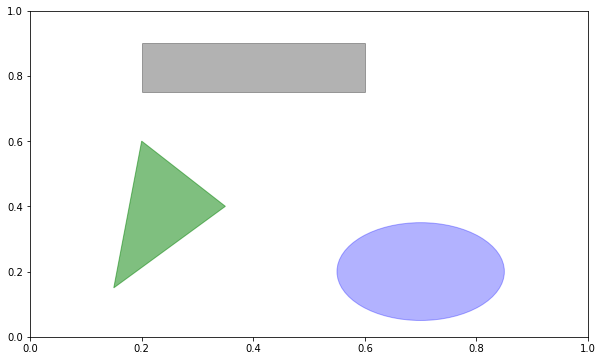

In [16]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

rect = plt.Rectangle((0.2, 0.75), 0.4, 0.15, color="k", alpha=0.3)
circ = plt.Circle((0.7, 0.2), 0.15, color="b", alpha=0.3)
pgon = plt.Polygon([[0.15, 0.15], [0.35, 0.4], [0.2, 0.6]],
                   color="g", alpha=0.5)

ax.add_patch(rect)
ax.add_patch(circ)
ax.add_patch(pgon)

In [17]:
# 보기 좋은 여러 가지 그래프를 잘 살펴보면 다양한 patches를 잘 조합했다는 사실을 확인할 수 있다. 

In [18]:
# 9.1.5 그래프를 파일로 저장하기

In [19]:
# 활성화된 figure는 plt.savefig 메서드를 이용해서 파일로 저장할 수 있다.

In [20]:
# 이 메서드는 figure 객체의 인스턴스 메서드인 savefig와 동일하다. 

In [21]:
# figure를 SVG 포맷으로 저장하려면 다음처럼 하면 된다. 

In [23]:
# plt.savefig(figpath.svg)

In [24]:
# 파일 종류는 확장자로 결정된다. 그러므로 .svg 대신에 .pdf를 입력하면 PDF 파일을 얻게 된다. 

In [25]:
# 출판용 그래픽 파일을 생성할 때 자주 사용하는 몇 가지 중요한 옵션이 있는데 바로 dpi와 bbox_inches다. 

In [26]:
# dpi는 인치당 도트 해상도를 조절하고 bbox_inches는 실제 figure 둘레의 공백을 잘라낸다. 

In [27]:
# 그래프 간 최소 공백을 가지는 400DPI짜리 PNG 파일을 만드려면 아래와 같이 입력한다.

In [28]:
# plt.savefig("figpath.png", dpi=400, bbox_inches="tight")

In [29]:
# savefig 메서드는 파일에 저장할 뿐만 아니라 BytesIO처럼 파일과 유사한 객체에 저장하는 것도 가능하다. 

In [31]:
from io import BytesIO
buffer = BytesIO()
plt.savefig(buffer)
plot_data = buffer.getvalue()

<Figure size 720x432 with 0 Axes>

In [32]:
# [표 9-2]에서 savefig의 다른 옵션을 확인할 수 있다. 페이지 364

In [33]:
# 9.1.6 matplotlib 설정

In [34]:
# matplotlib은 출판물용 그래프를 만드는 데 손색이 없는 기본 설정과 색상 스키마를 함께 제공한다. 

In [35]:
# 다행히도 거의 모든 기본 동작은 많은 전역 인자를 통해 설정 가능한데, 그래프 크기, 서브플롯 간격, 색상, 글자 크기, 격자 스타일과 같은 것들을 설정 가능하다. 

In [36]:
# matplotlib의 환경 설정 시스템은 두 가지 방법으로 다룰 수 있는데, 첫 번째는 rc 메서드를 사용해서 프로그래밍적으로 설정하는 방법이다. 

In [37]:
# 예를 들어 figure의 크기를 10 * 10  으로 전역 설정해두고 싶다면 다음 코드를 실행한다. 

In [38]:
plt.rc("figure", figsize=(10, 10))

In [39]:
# rc 메서드의 첫 번째 인자는 설정하고자 하는 "figure", "axes", "xtick", "ytick", "grid", "legend" 및 다른 컴포넌트의 이름이다. 

In [40]:
# 그 다음으로 설정할 값에 대한 키워드 인자를 넘기게 된다. 이 옵션을 쉽게 작성하려면 파이썬의 사전 타입을 사용한다. 

In [43]:
font_options = {"family" : "monospace",
                "weight": "bold", 
                "size": "small"}
# plt.rc("font", **font_options)

In [44]:
# 더 많은 설정과 옵션의 종류는 matplotlib/mpl-data 디렉터리에 matplotlibrc라는 파일에 저장되어 있다. 
# 다음 절에서 살펴볼 seaborn 패키지는 내부적으로 matplotlib 설정을 사용하는 내장 테마 혹은 스타일을 제공한다. 